<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### DIABETES PREDICTION(CLASSIFICATION) USING LOGISTIC REGRESSION

NAME: PENDEM SANJAY

 DATASET:<a href="https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download">Diabetes.csv</a>

<b>What does this model do?</b><br>
This model predicts wheather a person has diabetes or not based on some information

<b>How it does that?</b><br>
It uses Logistic Regresssion Algorithm which predicts a class based on previous data with which it was trainned

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### IMPORTING THE LIBRARIES:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


In [2]:
import pickle
#informally, this module saves the code and we can use it another time

In [3]:
import warnings
warnings.filterwarnings("ignore")
#suppresses warnings

<b>NUMPY:</b> provides mathematical functions<br>

<b>PANDAS:</b> used data analysis and manipulation <br>

<b>MATPLOTLIB:</b> provides tools for plotting

<b>SKLEARN:</b> provides tools for data analysis and machine learning

<b>SEABORN:</b> used for data visualization


#### IMPORTING THE DATASET:

In [4]:
data=pd.read_csv('diabetes.csv')
#Data Structure: pandas Dataframe

#### STUDYING AND ANALYSING THE DATASET:

In [5]:
data.head()
#first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.size
#total values in the dataset(rows x columns)

6912

In [8]:
data.shape
#(rows, columns)

(768, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
columns=[i for i in data.columns]
columns
#data[columns]


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [11]:
data.memory_usage()
#memory usage of each column in bytes

Index                        128
Pregnancies                 6144
Glucose                     6144
BloodPressure               6144
SkinThickness               6144
Insulin                     6144
BMI                         6144
DiabetesPedigreeFunction    6144
Age                         6144
Outcome                     6144
dtype: int64

In [12]:
data.isnull().sum()
#finding NULL values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data.nunique()
#number of unique values in each column

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [15]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [16]:
data.skew()
#for statistical purpose

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

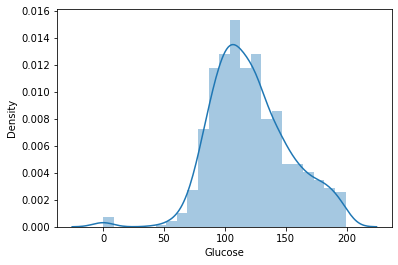

In [17]:
sns.distplot(data['Glucose'])
#distribution of data values across a certain range

In [18]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [20]:
data=shuffle(data)

#### FEATURES:

In [21]:
X=data.drop(columns='Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
481,0,123,88,37,0,35.2,0.197,29
64,7,114,66,0,0,32.8,0.258,42
400,4,95,64,0,0,32.0,0.161,31
458,10,148,84,48,237,37.6,1.001,51
288,4,96,56,17,49,20.8,0.340,26
...,...,...,...,...,...,...,...,...
483,0,84,82,31,125,38.2,0.233,23
558,11,103,68,40,0,46.2,0.126,42
406,4,115,72,0,0,28.9,0.376,46
334,1,95,60,18,58,23.9,0.260,22


#### LABELS:

In [22]:
Y=data['Outcome']
Y

481    0
64     1
400    1
458    1
288    0
      ..
483    0
558    0
406    1
334    0
176    0
Name: Outcome, Length: 768, dtype: int64

In [23]:
scaler=StandardScaler()

<b>SCALING:</b> It is used to transform the data so that it fits in specific scale i.e., the range of the data is changed<br>
<b>STANDARDIZATION:</b> It is a scaling technique where the values are centered around the mean.(σ=1, µ=0)<br>


In [24]:
new_data=scaler.fit_transform(X)

<b>TRANSFORMATION:</b>  Converting the raw data into a specific format

In [25]:
X=new_data
y=data['Outcome']

80% of data is used to train the model, the rest is used for testing

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,stratify=y)

<b>STRATIFY:</b>  stratify=y makes sure that labels wont get biased when splitted into y_train and y_test<br>

In [27]:
X_train.shape

(614, 8)

In [28]:
X_test.shape

(154, 8)

In [29]:
model=LogisticRegression(penalty="l2", C=10)
#above arguments are useless

#### TRAINING THE MODEL:

In [30]:
model.fit(X_train,y_train)

LogisticRegression(C=10)

#### PERFORMANCE ON TRAINING DATA AND TEST DATA:

In [31]:
X_train_pred=model.predict(X_train)
acc_train=accuracy_score(X_train_pred,y_train)

X_test_pred=model.predict(X_test)
acc_test=accuracy_score(X_test_pred,y_test)
print("Accuracy on Training Data:",acc_train*100,"%")
print("Accuracy on Test Data:",acc_test*100,"%")

Accuracy on Training Data: 79.15309446254072 %
Accuracy on Test Data: 78.57142857142857 %


#### EVALUATING THE MODEL:

In [32]:
input_values = [2,197,70,45,543,30.5,0.158,53]

The new input must be standardized since the model did the learning using standardized data
<br> Reshaping the array so that it wont expect 768 rows

In [33]:
pred_array=np.asarray(input_values).reshape(1,-1)
std_data=scaler.transform(pred_array)
std_data

array([[-0.54791859,  2.38188392,  0.04624525,  1.53455054,  4.02192191,
        -0.18943689, -0.94794368,  1.68125866]])

#### RESULTS:

In [34]:
predictions=model.predict(std_data)
if(predictions[0]==1):
    print("High chance of getting diabetes")
else:
    print("Low chance of getting diabetes")

High chance of getting diabetes


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

In [35]:
filename="logreg.sav" #saved file
pickle.dump(model,open(filename,'wb'))    
#'filename' is opened in 'wb'(write-binary) mode, all the contents are dumped in it